<a href="https://colab.research.google.com/github/jvrupp/NFTbot/blob/main/ProjetoMir4Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import mean_absolute_error

Mounted at /content/drive


In [8]:
data=pd.read_csv('/content/drive/MyDrive/DataMir4/out2.csv')
data[ 'preco' ] =  data[ 'preco' ] * 17.9614
steelBox = data['nome_item'] =='[E] Steel Box'#insira o nome
steelBox = data[steelBox]

steelBox[ 'preco2' ] = steelBox.preco.rolling(7).mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
X =steelBox['data'].values
Y =steelBox['preco2'].values
Y2=steelBox['preco'].values
X = X[6:]
Y = Y[6:]
Y2 = Y2[6:]

In [10]:
def verificaDegree(X,Y):
    wcss =[]
    for i in range(11):    
        function=np.polyfit(X,Y,i)
        modelo3=np.poly1d(function)
        y3=modelo3(X)
        mae3=mean_absolute_error(Y,y3)
        wcss.append(mae3)
    return (pd.DataFrame(wcss),y3)

def PlotLin(X,Y,grau):   
    function=np.polyfit(X,Y,grau)
    modelo3=np.poly1d(function)
    y3=modelo3(X)
    return (y3,modelo3)

def elbowMethod(dados):
    wcss=[]
    dados_cluster = dados.values
    dados_cluster[:,0]
    for i in range(1,11):
        KM=KMeans(n_clusters=i,random_state=42)
        KM.fit(dados_cluster)
        wcss.append(KM.inertia_)
        
    wcss =pd.DataFrame(wcss)
    return wcss

#wcss=elbowMethod(hip_compras)

def kmeans(dados,n):
    KM=KMeans(n_clusters=n,random_state=42,init='k-means++')
    predict=KM.fit_predict(dados)
    return predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


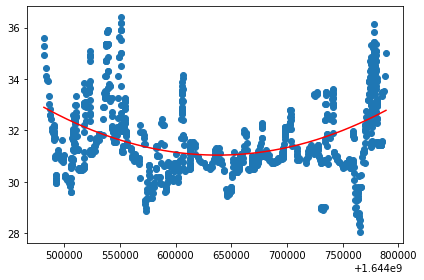

In [11]:
#wcss,y3=verificaDegree(X,Y)
y3,modelo=PlotLin(X,Y,5)


plt.scatter(X,Y)
plt.plot(X,y3,color='red')
plt.tight_layout()

#Calculando a 

dados_distancias = pd.DataFrame()
distancias =[]

for k,i in enumerate(list(X)):
    distancias.append(modelo(i)-Y2[k])


dados_distancias['tempos'] = pd.Series(X)
dados_distancias['precos'] = pd.Series(Y2)
dados_distancias['precos_modelo'] = pd.Series(y3)
dados_distancias['distancias'] = pd.Series(distancias)


hip_compras = dados_distancias[dados_distancias['distancias'] >=0]

#Processod e clusterizacao
from sklearn.cluster import KMeans


In [12]:
hip_compras['uns'] = np.ones(shape=(hip_compras.shape[0],1))
hip_compras['grupos'] = kmeans(hip_compras.iloc[:,3:],6)

#Selecionar os grupos
grupos = [1,2,3,4,5]
classificacao = []


for k,g in enumerate(grupos):    
    temp=hip_compras[hip_compras['grupos'] == g]
    classificacao.append((temp['distancias'].mean(),k))
    indice=max(classificacao)[1]+1

compra=hip_compras[hip_compras['grupos'] == indice]
    


compra['dt']=pd.to_datetime(compra['tempos'], unit='s')


"""
compra['grupos_F'] = kmeans(compra.iloc[:,[1,4]],2)


grupos_f = [1,2]
classificacao_f = []



for k,g in enumerate(grupos_f):    
    temp=compra[compra['grupos'] == g]
    classificacao_f.append((temp['distancias'].mean(),k))
    indice=min(classificacao_f)[1]+1

compra=compra[compra['grupos_F'] == indice]
"""
#tirar as variacoes de MSE relativa a curva da media movel
#clusterizar os diferentes tipos de movimentos(normal,forte)e tudo que for fora , tratar como uma anomalia , sendo ela positiva ou negativa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

"\ncompra['grupos_F'] = kmeans(compra.iloc[:,[1,4]],2)\n\n\ngrupos_f = [1,2]\nclassificacao_f = []\n\n\n\nfor k,g in enumerate(grupos_f):    \n    temp=compra[compra['grupos'] == g]\n    classificacao_f.append((temp['distancias'].mean(),k))\n    indice=min(classificacao_f)[1]+1\n\ncompra=compra[compra['grupos_F'] == indice]\n"

Saida Das Exelentes oportunidades de compra

In [13]:
compra

,tempos,precos,precos_modelo,distancias,uns,grupos,dt
175,1.644766e+09,17.9614,32.293694,14.332294,1.0,2,2022-02-13 15:26:30
293,1.644734e+09,17.9614,31.742027,13.780627,1.0,2,2022-02-13 06:29:10


In [15]:

import seaborn as sns



data=pd.read_csv('/content/drive/MyDrive/DataMir4/out2.csv')

data['data'] = pd.to_datetime(data['data'], unit='s')
steelBox = data['nome_item'] =='[E] Steel Box'
steelBox = data[steelBox]
qtd_datas=data['data'].value_counts()


mais_vandidos = data['nome_item'].value_counts()
#sns.lineplot(x='data', y='preco2',data=steelBox)


In [16]:

def PlotChart(nome,chave):
    
    BA = data['nome_item'] == nome
    BA = data[BA]
    

    BA[ 'preco2' ] = BA.preco.rolling( 7).mean() 
    
    if chave == 1:
        return sns.lineplot(x='data', y='preco2',data=BA)
    else:
        return sns.lineplot(x='data', y='preco',data=BA)
    
    

def ExtractDays(dados):
    dias = []
    meses =[]
    datas = pd.DataFrame()
    for i in range(steelBox.shape[0]):
        meses.append(dados['data'].iloc[i].month)
        dias.append(dados['data'].iloc[i].day)
        
    tempD = pd.Series(dias)
    tempM = pd.Series(meses)
    datas['dias']=tempD
    datas['meses'] = tempM     
    return datas

datas_volume=ExtractDays(steelBox)


def filtraDatas(datas_volume,meses):
    dias_volume = datas_volume[datas_volume['meses']==meses]
    dias_volume_counts = dias_volume['dias'].value_counts()
    return dias_volume_counts

def volumeHistorico(serie,datas_volume):
    data_volume_final = {}
    for i in serie:
        data_volume_final[i]=list(filtraDatas(datas_volume,i))
    
    return data_volume_final

def juntaVolumes(data_volume_final):
    temp =[]
    for i in data_volume_final:
        for j in  range(len(data_volume_final[i])):
            temp.append(data_volume_final[i][j])
    return temp


Fazemos um estudo dos volumes de contratos 

In [18]:

data_volume_final=volumeHistorico([11,12,1],datas_volume)
teste=pd.DataFrame(juntaVolumes(data_volume_final))

